### Goal
before we were understanding regression tasks, learn cost, geadients, gradient descent, feature scaling, normalization of features, linear and non linear data.. 

Now, we will learn these things using scikit-learn library to implement linear regression using Gradient Descent

### Loading Libraries and tools

In [1]:
# Import necessary libraries
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For plotting
from sklearn.linear_model import SGDRegressor  # Stochastic Gradient Descent Regressor from scikit-learn
from sklearn.preprocessing import StandardScaler  # For feature scaling (standardization)
from lab_utils_multi import load_house_data  # Custom function to load house data
from lab_utils_common import dlc  # Custom function for deep learning colors/styles
np.set_printoptions(precision=2)  # Set NumPy print options for better readability
plt.style.use('./deeplearning.mplstyle')  # Use a custom style for plotting

### Load Data

In [2]:
# Load the house data
X_train, y_train = load_house_data()
# Print X_train and y_train
print('X_train:', X_train)
print('y_train:', y_train)
# Define the feature names
X_features = ['size(sqft)','bedrooms','floors','age']

X_train: [[1.24e+03 3.00e+00 1.00e+00 6.40e+01]
 [1.95e+03 3.00e+00 2.00e+00 1.70e+01]
 [1.72e+03 3.00e+00 2.00e+00 4.20e+01]
 [1.96e+03 3.00e+00 2.00e+00 1.50e+01]
 [1.31e+03 2.00e+00 1.00e+00 1.40e+01]
 [8.64e+02 2.00e+00 1.00e+00 6.60e+01]
 [1.84e+03 3.00e+00 1.00e+00 1.70e+01]
 [1.03e+03 3.00e+00 1.00e+00 4.30e+01]
 [3.19e+03 4.00e+00 2.00e+00 8.70e+01]
 [7.88e+02 2.00e+00 1.00e+00 8.00e+01]
 [1.20e+03 2.00e+00 2.00e+00 1.70e+01]
 [1.56e+03 2.00e+00 1.00e+00 1.80e+01]
 [1.43e+03 3.00e+00 1.00e+00 2.00e+01]
 [1.22e+03 2.00e+00 1.00e+00 1.50e+01]
 [1.09e+03 2.00e+00 1.00e+00 6.40e+01]
 [8.48e+02 1.00e+00 1.00e+00 1.70e+01]
 [1.68e+03 3.00e+00 2.00e+00 2.30e+01]
 [1.77e+03 3.00e+00 2.00e+00 1.80e+01]
 [1.04e+03 3.00e+00 1.00e+00 4.40e+01]
 [1.65e+03 2.00e+00 1.00e+00 2.10e+01]
 [1.09e+03 2.00e+00 1.00e+00 3.50e+01]
 [1.32e+03 3.00e+00 1.00e+00 1.40e+01]
 [1.59e+03 0.00e+00 1.00e+00 2.00e+01]
 [9.72e+02 2.00e+00 1.00e+00 7.30e+01]
 [1.10e+03 3.00e+00 1.00e+00 3.70e+01]
 [1.00e+03 2.00e

In [7]:
# Print number of training examples and number of features
m, n = X_train.shape
print('Number of training examples:', m)
print('Number of features:', n)

Number of training examples: 99
Number of features: 4


### Scale/normalize the training data

In [3]:
# Import StandardScaler from sklearn to perform feature scaling

# This line initializes an instance of StandardScaler, a class from sklearn that standardizes features by removing
# the mean and scaling them to unit variance.

# Standardization is important when using gradient descent or other optimization algorithms because it ensures that
# all features contribute equally to the model training process.
scaler = StandardScaler()

# Normalize the feature data using StandardScaler

# Fit: Calculates the mean and standard deviation for each feature in the dataset.

# Transform: Applies the standardization by subtracting the mean and dividing by the standard deviation for each feature.
X_norm = scaler.fit_transform(X_train)

# Print the normalized data
print('Normalized X_train:', X_norm)


Normalized X_train: [[-4.24e-01  4.34e-01 -7.89e-01  9.94e-01]
 [ 1.28e+00  4.34e-01  1.27e+00 -8.30e-01]
 [ 7.45e-01  4.34e-01  1.27e+00  1.40e-01]
 [ 1.31e+00  4.34e-01  1.27e+00 -9.07e-01]
 [-2.54e-01 -1.10e+00 -7.89e-01 -9.46e-01]
 [-1.35e+00 -1.10e+00 -7.89e-01  1.07e+00]
 [ 1.01e+00  4.34e-01 -7.89e-01 -8.30e-01]
 [-9.53e-01  4.34e-01 -7.89e-01  1.79e-01]
 [ 4.31e+00  1.97e+00  1.27e+00  1.89e+00]
 [-1.53e+00 -1.10e+00 -7.89e-01  1.61e+00]
 [-5.31e-01 -1.10e+00  1.27e+00 -8.30e-01]
 [ 3.37e-01 -1.10e+00 -7.89e-01 -7.91e-01]
 [ 2.82e-02  4.34e-01 -7.89e-01 -7.13e-01]
 [-4.82e-01 -1.10e+00 -7.89e-01 -9.07e-01]
 [-7.93e-01 -1.10e+00 -7.89e-01  9.94e-01]
 [-1.39e+00 -2.63e+00 -7.89e-01 -8.30e-01]
 [ 6.40e-01  4.34e-01  1.27e+00 -5.97e-01]
 [ 8.49e-01  4.34e-01  1.27e+00 -7.91e-01]
 [-9.19e-01  4.34e-01 -7.89e-01  2.18e-01]
 [ 5.68e-01 -1.10e+00 -7.89e-01 -6.74e-01]
 [-8.03e-01 -1.10e+00 -7.89e-01 -1.31e-01]
 [-2.49e-01  4.34e-01 -7.89e-01 -9.46e-01]
 [ 4.24e-01 -4.17e+00 -7.89e-01 -7

In [4]:
# Print the peak-to-peak (range) of each column in the raw (original) and normalized data

# np.ptp computes the peak-to-peak (range) value of the data along the specified axis. It’s essentially the 
# difference between the maximum and minimum values in each column (feature) of X_train.

# axis=0 indicates that the operation should be performed column-wise.

print(f"Peak to Peak range by column in Raw        X: {np.ptp(X_train, axis=0)}")
print(f"Peak to Peak range by column in Normalized X: {np.ptp(X_norm, axis=0)}")

Peak to Peak range by column in Raw        X: [2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X: [5.85 6.14 2.06 3.69]


### Gradient Descent with scikit learn
#### Create and fit the regression model

Stochastic Gradient Descent (SGD).. we will use this to get optimal w and b for our dataset

In [8]:
# Create and fit the regression model
# SGDRegressor is a linear model from Scikit-learn that uses Stochastic Gradient Descent (SGD)
# to optimize the weights. It is suitable for large datasets and can be used for regression tasks.

# This line initializes the SGDRegressor model with a maximum of 1000 iterations. This means the algorithm will go
# through the data up to 1000 times to adjust the weights to minimize the error.
sgdr = SGDRegressor(max_iter=1000)  # Create the SGDRegressor model with a maximum of 1000 iterations

# sgdr.fit(X_norm, y_train): This line fits the model to your normalized data X_norm and the target values y_train.
# The model learns the relationship between the input features and the target variable by adjusting the weights.
sgdr.fit(X_norm, y_train)  # Fit the model to the normalized training data

# Calculate the normalized weights and bias
b_norm = sgdr.intercept_
w_norm = sgdr.coef_

# Output the model details
print(sgdr)
print(f"Number of iterations completed: {sgdr.n_iter_}, Number of weight updates: {sgdr.t_}")

print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")


SGDRegressor()
Number of iterations completed: 128, Number of weight updates: 12673.0
model parameters:                   w: [110.24 -21.09 -32.5  -38.04], b:[363.17]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


### Make predictions

In [13]:
# Make predictions using sgdr.predict(X_norm)
y_pred_sgd = sgdr.predict(X_norm)

# Make predictions using w_norm and b_norm
y_pred = np.dot(X_norm, w_norm) + b_norm

# Print the predicted values
print(f"Predicted values using SGDRegressor:, {y_pred_sgd[:4]}")
print(f"Predicted values using w_norm and b_norm:, {y_pred[:4]}")
print(f"Target values:, {y_train[:4]}")

Predicted values using SGDRegressor:, [295.17 485.97 389.62 492.14]
Predicted values using w_norm and b_norm:, [295.17 485.97 389.62 492.14]
Target values:, [300.  509.8 394.  540. ]


### Plot Results
Let's plot the predictions versus the target values.

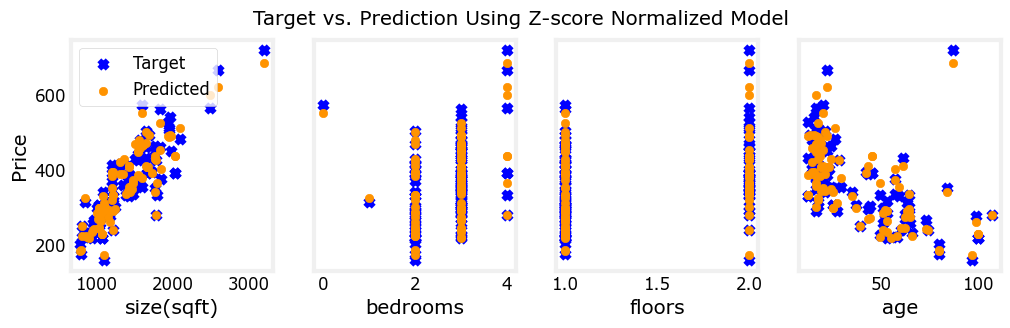

In [15]:
# Create subplots to visualize predictions vs. actual targets for each feature
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)

# Iterate over each feature to create subplots
for i in range(len(ax)):
    # Scatter plot of actual target values vs. feature values
    ax[i].scatter(X_train[:, i], y_train, label='Target', color='blue', marker='x')
    # Scatter plot of predicted values vs. feature values
    ax[i].scatter(X_train[:, i], y_pred, color=dlc["dlorange"], label='Predicted', marker='o')
    # Label the x-axis with feature names
    ax[i].set_xlabel(X_features[i])

# Set common y-axis label and legend for the first subplot
ax[0].set_ylabel("Price")
ax[0].legend()

# Set the title for the entire figure
fig.suptitle("Target vs. Prediction Using Z-score Normalized Model")

# Display the plot
plt.show()